<a href="https://colab.research.google.com/github/sunshineluyao/CV_XAI/blob/master/DataProcessing/DataWrangling_2021_01_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print('Authenticated')

Mounted at /content/drive
Authenticated


In [ ]:
### be sure to provide the raw link
import pandas as pd
import numpy as np


**Step 1:** import data

In [ ]:
df_Volume=pd.read_csv("https://raw.githubusercontent.com/sunshineluyao/CVML2021/main/CMC.csv")
df_Volume.head()

,Date,Volume
0,"Dec 31, 2020","$40,730,301,359"
1,"Dec 30, 2020","$46,754,964,848"
2,"Dec 29, 2020","$51,287,442,704"
3,"Dec 28, 2020","$45,265,946,774"
4,"Dec 27, 2020","$49,056,742,893"


In [ ]:
df_Volume['Date']=pd.to_datetime(df_Volume['Date'])
df_Volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2804 entries, 0 to 2803
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2804 non-null   datetime64[ns]
 1   Volume  2804 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 43.9+ KB


In [ ]:
pd.Timestamp(df_Volume['Date'][0])

Timestamp('2020-12-31 00:00:00')

In [ ]:
df_Volume['Date']=df_Volume['Date'].dt.strftime('%Y-%m-%d')

In [ ]:
df_Volume.head()

,Date,Volume
0,2020-12-31,"$40,730,301,359"
1,2020-12-30,"$46,754,964,848"
2,2020-12-29,"$51,287,442,704"
3,2020-12-28,"$45,265,946,774"
4,2020-12-27,"$49,056,742,893"


In [ ]:
df_Volume.set_index('Date',drop=True,inplace=True)

In [ ]:
df_Volume.index.name=None
df_Volume.head()

,Volume
2020-12-31,"$40,730,301,359"
2020-12-30,"$46,754,964,848"
2020-12-29,"$51,287,442,704"
2020-12-28,"$45,265,946,774"
2020-12-27,"$49,056,742,893"


In [ ]:
df_Volume['Volume']=df_Volume['Volume'].str.replace(',', '')
df_Volume['Volume']=df_Volume['Volume'].str.replace('$', '')
df_Volume.head()

,Volume
2020-12-31,40730301359
2020-12-30,46754964848
2020-12-29,51287442704
2020-12-28,45265946774
2020-12-27,49056742893


In [ ]:
df_Volume['Volume']=pd.to_numeric(df_Volume['Volume'])

In [ ]:
df_Volume = df_Volume[['Volume']]

In [ ]:
###reverse the dataframe: https://www.marsja.se/six-ways-to-reverse-pandas-dataframe/
df_Volume = df_Volume.sort_index(ascending=True)
df_Volume.tail()

,Volume
2020-12-27,49056742893
2020-12-28,45265946774
2020-12-29,51287442704
2020-12-30,46754964848
2020-12-31,40730301359


In [ ]:
df_CM=pd.read_csv("https://raw.githubusercontent.com/coinmetrics-io/data/master/csv/btc.csv")
df_CM.head()

,time,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
0,2009-01-03,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,2009-01-06,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,2009-01-07,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [ ]:
#set "date" column as the index
df_CM.set_index('time', inplace=True)


In [ ]:
#to remove the name of the index
df_CM.index.name=None
df_CM=df_CM[df_CM.index<'2021-01-01']
df_CM.tail()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
2020-12-27,1049825.0,148.0,193716651.0,1.308896e+06,3.033870,4.911576e+11,1.618915e+11,1.866826e+13,0.000295,7.792538,0.000158,4.162860,89.698259,2.370802e+06,1.373446e+08,925.0,1.816875,2.444854e+07,925.0,2.444854e+07,76.839437,114.994093,1.0,26430.856597,261.737332,54.551925,1.858273e+07,2.056073e+07,1.449817e+07,304240.0,808638.0,241838.497017,6.391999e+09,0.657102,17367.771562,0.005215,137.846432,531357.733666,1.404424e+10,0.027924,0.034667,0.034255
2020-12-28,1154354.0,160.0,206766595.0,1.292291e+06,3.033361,5.024921e+11,1.656552e+11,1.859959e+13,0.000327,8.834168,0.000164,4.436346,102.752936,2.778372e+06,1.479345e+08,1000.0,1.964065,2.703935e+07,1000.0,2.703935e+07,46.737221,115.311281,1.0,27039.349020,265.812917,52.374044,1.858373e+07,2.056098e+07,1.449831e+07,314503.0,874761.0,397621.711422,1.075143e+10,0.809730,21894.585318,0.005513,149.061442,708320.652738,1.915253e+10,0.027950,0.034447,0.034285
2020-12-29,1146131.0,152.0,194179955.0,1.277500e+06,3.006909,5.060833e+11,1.683068e+11,1.859959e+13,0.000313,8.530911,0.000164,4.470274,104.816233,2.854272e+06,1.405378e+08,950.0,1.865880,2.586964e+07,950.0,2.586964e+07,54.785860,114.333016,1.0,27231.203455,276.673228,49.697118,1.858468e+07,2.056122e+07,1.449554e+07,334580.0,924443.0,339224.096073,9.237480e+09,0.765763,20852.655461,0.005631,153.351433,707904.496552,1.927709e+10,0.027902,0.034408,0.034289
2020-12-30,1221579.0,172.0,215838093.0,1.254873e+06,3.148488,5.360990e+11,1.702719e+11,1.859959e+13,0.000315,9.091743,0.000171,4.940794,107.456738,3.099548e+06,1.590296e+08,1075.0,2.111160,3.100796e+07,1075.0,3.100796e+07,55.434481,119.111340,1.0,28844.613678,302.442079,46.684376,1.858576e+07,2.056149e+07,1.449659e+07,340919.0,975313.0,335274.336904,9.670859e+09,0.757514,21850.191708,0.005500,158.645375,738813.015952,2.131078e+10,0.028155,0.033276,0.034798
2020-12-31,1193822.0,166.0,213533786.0,1.286348e+06,3.140996,5.394385e+11,1.717412e+11,1.859959e+13,0.000324,9.410102,0.000171,4.953880,109.734643,3.184792e+06,1.534821e+08,1037.5,2.037401,3.011102e+07,1037.5,3.011102e+07,58.060025,118.111923,1.0,29022.671413,304.743570,54.206877,1.858680e+07,2.056175e+07,1.449855e+07,338444.0,960459.0,320130.702126,9.291048e+09,0.646718,18769.470179,0.005219,151.460760,621145.665821,1.802731e+10,0.028156,0.031550,0.034733


In [ ]:
df_UTXO=pd.read_csv("https://raw.githubusercontent.com/sunshineluyao/CVML2021/main/UTXO_Age.csv",index_col="Unnamed: 0")
df_UTXO.head()

,<1d,1d ~ 1m,1m ~ 1q,1q ~ 6m,6m ~ 1y,1y ~ 2y,2y ~ 3y,3y ~ 4y,4y ~ 5y,5y~10y,>10y,date
0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009-01-03
1,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009-01-04
2,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009-01-05
3,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009-01-06
4,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009-01-07


In [ ]:
#set "date" column as the index
df_UTXO.set_index('date', inplace=True)
#to remove the name of the index
df_UTXO.index.name=None
df_UTXO.tail()

,<1d,1d ~ 1m,1m ~ 1q,1q ~ 6m,6m ~ 1y,1y ~ 2y,2y ~ 3y,3y ~ 4y,4y ~ 5y,5y~10y,>10y
2020-12-27,330967.381654,2.263877e+06,2.087571e+06,1.187171e+06,1.655101e+06,2.290387e+06,2.468687e+06,1.690639e+06,538801.628064,2.207541e+06,1.862122e+06
2020-12-28,393035.719930,2.369376e+06,2.074029e+06,1.179166e+06,1.556101e+06,2.250222e+06,2.457024e+06,1.695704e+06,538858.120868,2.207849e+06,1.862500e+06
2020-12-29,367692.792983,2.521236e+06,1.953404e+06,1.197938e+06,1.541260e+06,2.246432e+06,2.449702e+06,1.698538e+06,538618.288175,2.207290e+06,1.862703e+06
2020-12-30,359679.098520,2.549066e+06,1.948804e+06,1.194354e+06,1.538123e+06,2.242105e+06,2.427935e+06,1.714888e+06,541265.006106,2.206444e+06,1.863226e+06
2020-12-31,350284.789416,2.536198e+06,1.990192e+06,1.193568e+06,1.533916e+06,2.236024e+06,2.416903e+06,1.719278e+06,541672.355428,2.205148e+06,1.863744e+06


**Step 2: merge two data frame**

In [ ]:
###merge two dataframes
##merge two datasets on dates that apply to both

###pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
        ### left_index=False, right_index=False, sort=True,
         ###suffixes=('_x', '_y'), copy=True, indicator=False,
         ###validate=None)
df_btc = pd.merge(df_CM, df_Volume, how='outer', left_index=True, right_index=True)
df_btc.tail()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,Volume
2020-12-27,1049825.0,148.0,193716651.0,1.308896e+06,3.033870,4.911576e+11,1.618915e+11,1.866826e+13,0.000295,7.792538,0.000158,4.162860,89.698259,2.370802e+06,1.373446e+08,925.0,1.816875,2.444854e+07,925.0,2.444854e+07,76.839437,114.994093,1.0,26430.856597,261.737332,54.551925,1.858273e+07,2.056073e+07,1.449817e+07,304240.0,808638.0,241838.497017,6.391999e+09,0.657102,17367.771562,0.005215,137.846432,531357.733666,1.404424e+10,0.027924,0.034667,0.034255,4.905674e+10
2020-12-28,1154354.0,160.0,206766595.0,1.292291e+06,3.033361,5.024921e+11,1.656552e+11,1.859959e+13,0.000327,8.834168,0.000164,4.436346,102.752936,2.778372e+06,1.479345e+08,1000.0,1.964065,2.703935e+07,1000.0,2.703935e+07,46.737221,115.311281,1.0,27039.349020,265.812917,52.374044,1.858373e+07,2.056098e+07,1.449831e+07,314503.0,874761.0,397621.711422,1.075143e+10,0.809730,21894.585318,0.005513,149.061442,708320.652738,1.915253e+10,0.027950,0.034447,0.034285,4.526595e+10
2020-12-29,1146131.0,152.0,194179955.0,1.277500e+06,3.006909,5.060833e+11,1.683068e+11,1.859959e+13,0.000313,8.530911,0.000164,4.470274,104.816233,2.854272e+06,1.405378e+08,950.0,1.865880,2.586964e+07,950.0,2.586964e+07,54.785860,114.333016,1.0,27231.203455,276.673228,49.697118,1.858468e+07,2.056122e+07,1.449554e+07,334580.0,924443.0,339224.096073,9.237480e+09,0.765763,20852.655461,0.005631,153.351433,707904.496552,1.927709e+10,0.027902,0.034408,0.034289,5.128744e+10
2020-12-30,1221579.0,172.0,215838093.0,1.254873e+06,3.148488,5.360990e+11,1.702719e+11,1.859959e+13,0.000315,9.091743,0.000171,4.940794,107.456738,3.099548e+06,1.590296e+08,1075.0,2.111160,3.100796e+07,1075.0,3.100796e+07,55.434481,119.111340,1.0,28844.613678,302.442079,46.684376,1.858576e+07,2.056149e+07,1.449659e+07,340919.0,975313.0,335274.336904,9.670859e+09,0.757514,21850.191708,0.005500,158.645375,738813.015952,2.131078e+10,0.028155,0.033276,0.034798,4.675496e+10
2020-12-31,1193822.0,166.0,213533786.0,1.286348e+06,3.140996,5.394385e+11,1.717412e+11,1.859959e+13,0.000324,9.410102,0.000171,4.953880,109.734643,3.184792e+06,1.534821e+08,1037.5,2.037401,3.011102e+07,1037.5,3.011102e+07,58.060025,118.111923,1.0,29022.671413,304.743570,54.206877,1.858680e+07,2.056175e+07,1.449855e+07,338444.0,960459.0,320130.702126,9.291048e+09,0.646718,18769.470179,0.005219,151.460760,621145.665821,1.802731e+10,0.028156,0.031550,0.034733,4.073030e+10


In [ ]:
df_btc.tail()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,Volume
2020-12-27,1049825.0,148.0,193716651.0,1.308896e+06,3.033870,4.911576e+11,1.618915e+11,1.866826e+13,0.000295,7.792538,0.000158,4.162860,89.698259,2.370802e+06,1.373446e+08,925.0,1.816875,2.444854e+07,925.0,2.444854e+07,76.839437,114.994093,1.0,26430.856597,261.737332,54.551925,1.858273e+07,2.056073e+07,1.449817e+07,304240.0,808638.0,241838.497017,6.391999e+09,0.657102,17367.771562,0.005215,137.846432,531357.733666,1.404424e+10,0.027924,0.034667,0.034255,4.905674e+10
2020-12-28,1154354.0,160.0,206766595.0,1.292291e+06,3.033361,5.024921e+11,1.656552e+11,1.859959e+13,0.000327,8.834168,0.000164,4.436346,102.752936,2.778372e+06,1.479345e+08,1000.0,1.964065,2.703935e+07,1000.0,2.703935e+07,46.737221,115.311281,1.0,27039.349020,265.812917,52.374044,1.858373e+07,2.056098e+07,1.449831e+07,314503.0,874761.0,397621.711422,1.075143e+10,0.809730,21894.585318,0.005513,149.061442,708320.652738,1.915253e+10,0.027950,0.034447,0.034285,4.526595e+10
2020-12-29,1146131.0,152.0,194179955.0,1.277500e+06,3.006909,5.060833e+11,1.683068e+11,1.859959e+13,0.000313,8.530911,0.000164,4.470274,104.816233,2.854272e+06,1.405378e+08,950.0,1.865880,2.586964e+07,950.0,2.586964e+07,54.785860,114.333016,1.0,27231.203455,276.673228,49.697118,1.858468e+07,2.056122e+07,1.449554e+07,334580.0,924443.0,339224.096073,9.237480e+09,0.765763,20852.655461,0.005631,153.351433,707904.496552,1.927709e+10,0.027902,0.034408,0.034289,5.128744e+10
2020-12-30,1221579.0,172.0,215838093.0,1.254873e+06,3.148488,5.360990e+11,1.702719e+11,1.859959e+13,0.000315,9.091743,0.000171,4.940794,107.456738,3.099548e+06,1.590296e+08,1075.0,2.111160,3.100796e+07,1075.0,3.100796e+07,55.434481,119.111340,1.0,28844.613678,302.442079,46.684376,1.858576e+07,2.056149e+07,1.449659e+07,340919.0,975313.0,335274.336904,9.670859e+09,0.757514,21850.191708,0.005500,158.645375,738813.015952,2.131078e+10,0.028155,0.033276,0.034798,4.675496e+10
2020-12-31,1193822.0,166.0,213533786.0,1.286348e+06,3.140996,5.394385e+11,1.717412e+11,1.859959e+13,0.000324,9.410102,0.000171,4.953880,109.734643,3.184792e+06,1.534821e+08,1037.5,2.037401,3.011102e+07,1037.5,3.011102e+07,58.060025,118.111923,1.0,29022.671413,304.743570,54.206877,1.858680e+07,2.056175e+07,1.449855e+07,338444.0,960459.0,320130.702126,9.291048e+09,0.646718,18769.470179,0.005219,151.460760,621145.665821,1.802731e+10,0.028156,0.031550,0.034733,4.073030e+10


**step 3: visualization**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df_btc.index=pd.to_datetime(df_btc.index)

In [ ]:
print(plt.style.available)
####Check different styles here: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
plt.style.use('seaborn-bright')

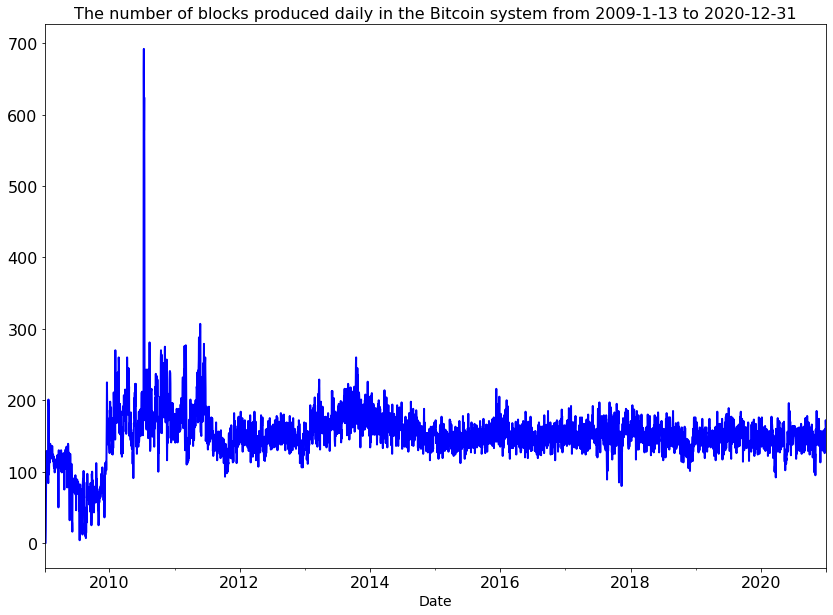

In [ ]:
### Plot The number of block produced daily in the Bitcoin system.
ax = df_btc['BlkCnt'].plot(color='blue', figsize=(14, 10), linewidth=2, fontsize=16)

# Specify the x-axis label in your plot
ax.set_xlabel('Date',fontsize=14)

# Specify the title in your plot
ax.set_title('The number of blocks produced daily in the Bitcoin system from 2009-1-13 to 2020-12-31', fontsize=16)


# Show plot
plt.savefig('/content/drive/My Drive/CVML2021/BlkCnt.png')

In [ ]:
print(df_btc['BlkCnt'].mean())

151.54462451495093


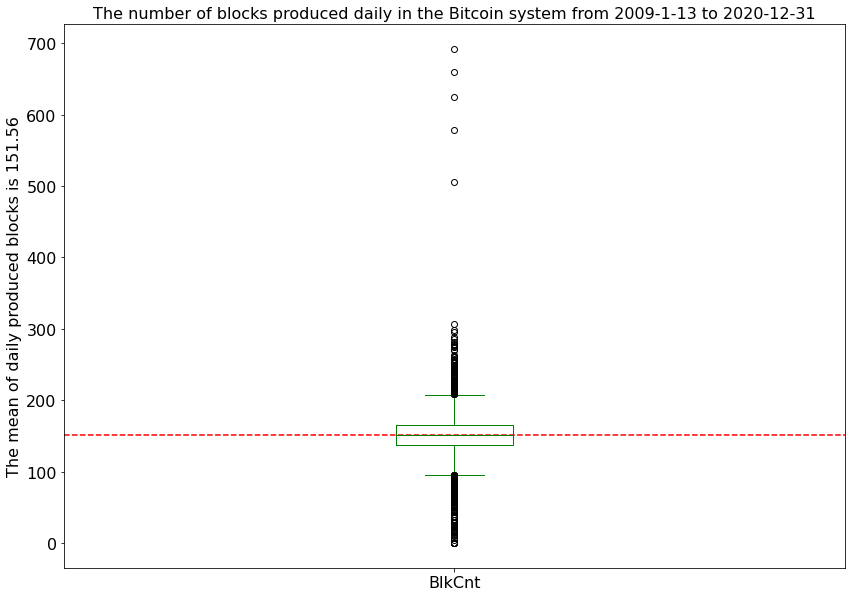

In [ ]:
### Plot The Boxplot for number of block produced daily in the Bitcoin system.
###Check the types of plot: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html
ax = df_btc['BlkCnt'].plot(kind='box', color='green', figsize=(14, 10), fontsize=16)


# Specify the title in your plot
ax.set_title('The number of blocks produced daily in the Bitcoin system from 2009-1-13 to 2020-12-31', fontsize=16)
ax.set_ylabel('The mean of daily produced blocks is 151.56', fontsize=16)


# Add a red horizontal line for the mean
ax.axhline(151.5588436148418, color='red', linestyle='--')
# Show plot
plt.savefig('/content/drive/My Drive/CVML2021/btc_blockdaily_boxplot.png')

In [ ]:
plt.show()

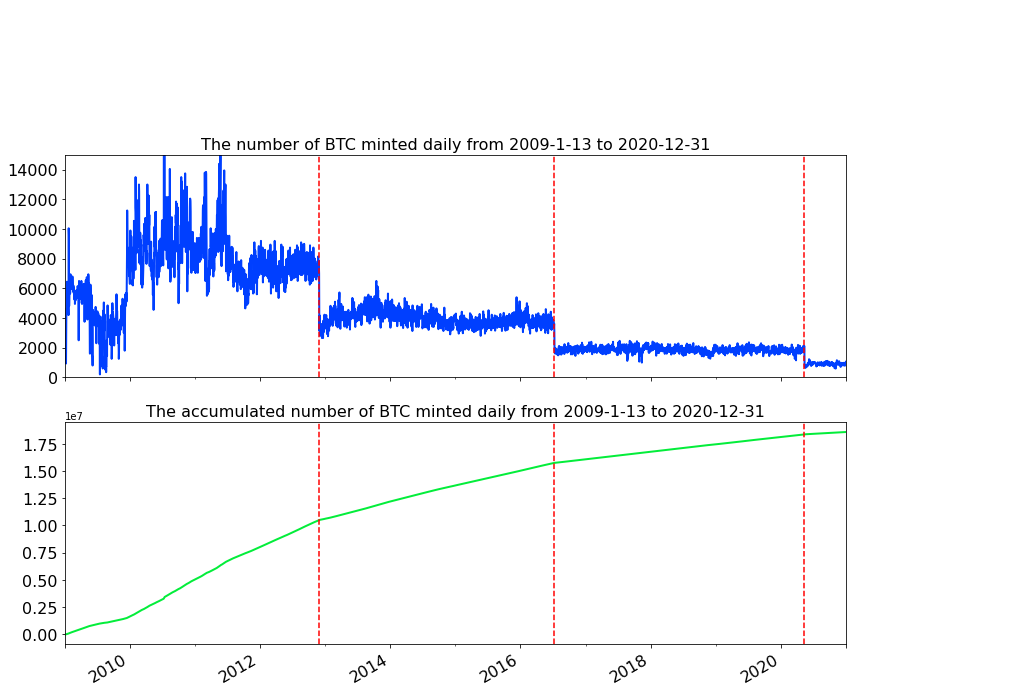

In [ ]:
#### Plot The number and accumulated number of BTC minted daily in scatter plot and the total BTC minted in line plot
###Check all color maps here https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
ax = df_btc[['IssTotNtv','SplyCur']].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The number of BTC minted daily from 2009-1-13 to 2020-12-31',fontsize=16)
ax[1][0].set_title('The accumulated number of BTC minted daily from 2009-1-13 to 2020-12-31',fontsize=16)
ax[0][0].set_ylim([0,15000])
# Add a red vertical line for the first halving date
ax[0][0].axvline('2012-11-28', color='red', linestyle='--')
ax[1][0].axvline('2012-11-28', color='red', linestyle='--')
ax[0][0].annotate('the first halving date 2012-11-28',
            xy=('2012-12-28', 25000), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
# Add a red vertical line for the second halving date
ax[0][0].axvline('2016-07-09', color='red', linestyle='--')
ax[1][0].axvline('2016-07-09', color='red', linestyle='--')
ax[0][0].annotate('the second halving date 2016-07-09',
            xy=('2016-08-09', 20000), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
# Add a red vertical line for the third halving date
ax[0][0].axvline('2020-05-11', color='red', linestyle='--')
ax[1][0].axvline('2020-05-11', color='red', linestyle='--')
ax[0][0].annotate('the third halving date 2020-05-11',
            xy=('2020-06-11', 20000), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
plt.savefig('/content/drive/My Drive/CVML2021/btc_halving.png')


In [ ]:
####Calculate the annualized Bitcoin dilution rate 
####More about Rolling average here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html
####annualized dilution rate in percentage=100*365*the moving average of the number of generated btc in the past 30 days/total generated btc
df_btc['Annualized_DilutionRate']=100*365*df_btc['IssTotNtv'].rolling(window=30).mean()/df_btc['SplyCur']

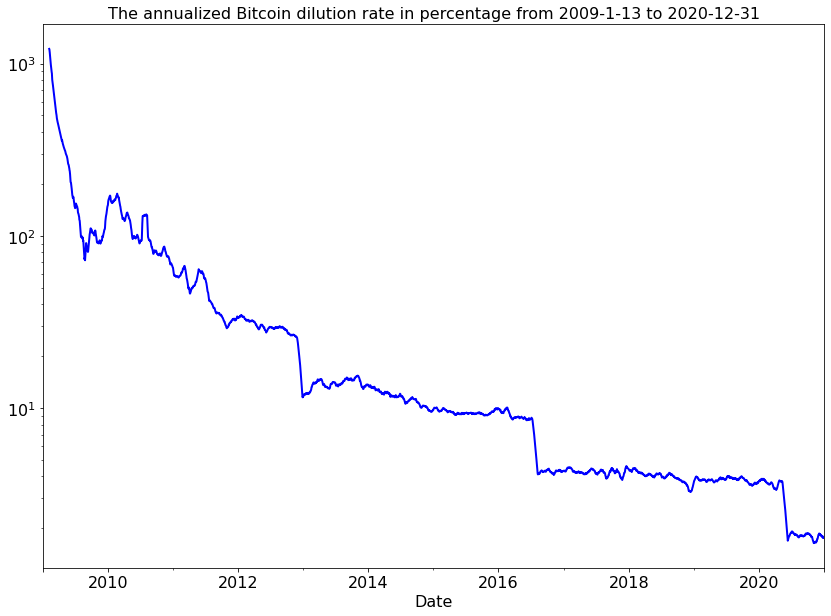

In [ ]:
### Plot The annualized Bitcoin dilution rate in percentage.
ax = df_btc['Annualized_DilutionRate'].plot(color='blue', figsize=(14, 10), linewidth=2, fontsize=16)

# Specify the x-axis label in your plot
ax.set_xlabel('Date',fontsize=16)

# Specify the title in your plot
ax.set_title('The annualized Bitcoin dilution rate in percentage from 2009-1-13 to 2020-12-31', fontsize=16)
ax.set_yscale('log')

# Show plot
plt.savefig('/content/drive/My Drive/CVML2021/btc_dilution.png')

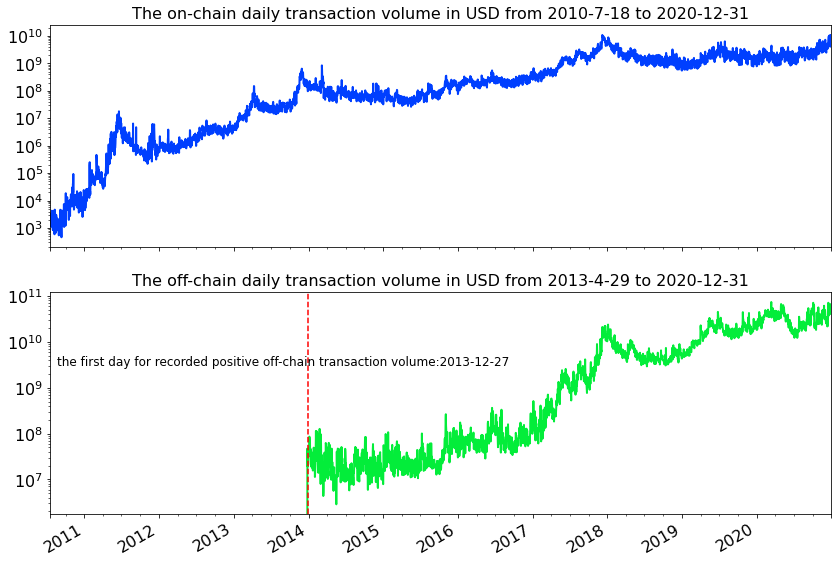

In [ ]:
#### Plot the on-chain transaction volume and off-chain transaction volume
ax = df_btc[['TxTfrValAdjUSD','Volume']]['2010-07-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The on-chain daily transaction volume in USD from 2010-7-18 to 2020-12-31',fontsize=16)
ax[1][0].set_title('The off-chain daily transaction volume in USD from 2013-4-29 to 2020-12-31',fontsize=16)
ax[1][0].axvline('2013-12-27', color='red', linestyle='--')
ax[1][0].annotate('the first day for recorded positive off-chain transaction volume:2013-12-27',
            xy=('2010-08-18', 5000000000), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
ax[0][0].set_yscale('log')
ax[1][0].set_yscale('log')
plt.savefig('/content/drive/My Drive/CVML2021/btc_volume_two.png')

In [ ]:
###calculate the total transaction volume
####calculate daily Revenue 
df_btc['Total daily transaction volume']=df_btc['TxTfrValAdjUSD']+df_btc['Volume']
df_btc['Total daily transaction volume']['2010-07-18':'2013-4-28']=df_btc['TxTfrValAdjUSD']['2010-07-18':'2013-4-28']
df_btc[['Total daily transaction volume','TxTfrValAdjUSD','Volume']]['2010-07-18':'2013-4-28']

,Total daily transaction volume,TxTfrValAdjUSD,Volume
2010-07-18,1.474778e+03,1.474778e+03,NaN
2010-07-19,3.251693e+03,3.251693e+03,NaN
2010-07-20,1.200497e+03,1.200497e+03,NaN
2010-07-21,1.649916e+03,1.649916e+03,NaN
2010-07-22,1.932369e+03,1.932369e+03,NaN
...,...,...,...
2013-04-24,6.443871e+07,6.443871e+07,NaN
2013-04-25,5.733851e+07,5.733851e+07,NaN
2013-04-26,4.017714e+07,4.017714e+07,NaN
2013-04-27,3.695666e+07,3.695666e+07,NaN


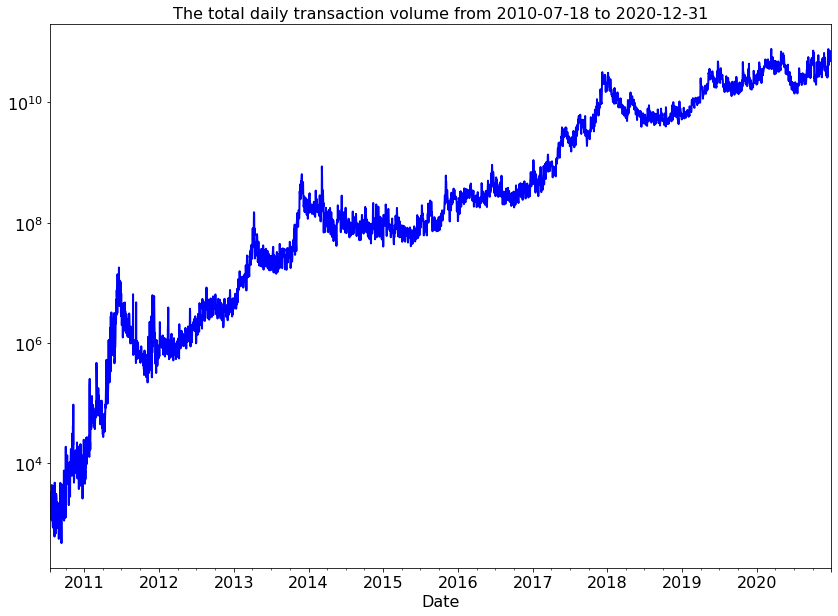

In [ ]:
###Plot total daily transaction volume
ax = df_btc['Total daily transaction volume']['2010-07-18':].plot(color='blue', figsize=(14, 10), linewidth=2, fontsize=16)

# Specify the x-axis label in your plot
ax.set_xlabel('Date',fontsize=16)

# Specify the title in your plot
ax.set_title('The total daily transaction volume from 2010-07-18 to 2020-12-31', fontsize=16)

# Show plot
ax.set_yscale('log')
plt.savefig('/content/drive/My Drive/CVML2021/btc_volume_total')

In [ ]:
####Calculate the velocity
####More about Rolling average here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html
####The velocity in percentage=100*the moving average of the volumn in the past 90 days/total market cap
df_btc['Velocity']=100*df_btc['Total daily transaction volume'].rolling(window=90).mean()/df_btc['CapMrktCurUSD']

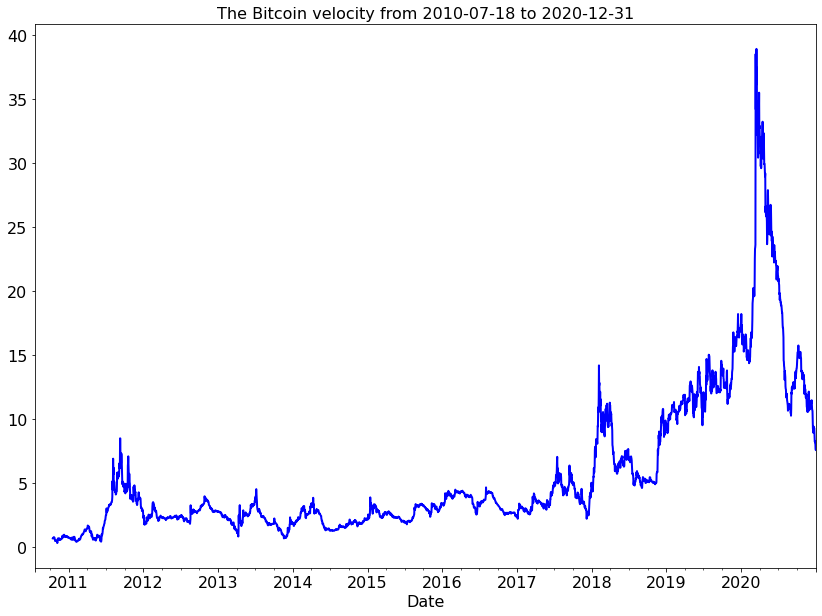

In [ ]:
### Plot The Bitcoin velocity in percentage
ax = df_btc['Velocity']['2010-07-18':].plot(color='blue', figsize=(14, 10), linewidth=2, fontsize=16)

# Specify the x-axis label in your plot
ax.set_xlabel('Date',fontsize=16)

# Specify the title in your plot
ax.set_title('The Bitcoin velocity from 2010-07-18 to 2020-12-31', fontsize=16)

# Show plot
plt.savefig('/content/drive/My Drive/CVML2021/btc_velocity.png')

In [ ]:
####Exploring the age of bitcoin
df_UTXO.info()
###the column marked with y are accumulated values and the column marked with text are interval values

<class 'pandas.core.frame.DataFrame'>
Index: 4381 entries, 2009-01-03 to 2020-12-31
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   <1d      4381 non-null   float64
 1   1d ~ 1m  4381 non-null   float64
 2   1m ~ 1q  4381 non-null   float64
 3   1q ~ 6m  4381 non-null   float64
 4   6m ~ 1y  4381 non-null   float64
 5   1y ~ 2y  4381 non-null   float64
 6   2y ~ 3y  4381 non-null   float64
 7   3y ~ 4y  4381 non-null   float64
 8   4y ~ 5y  4381 non-null   float64
 9    5y~10y  4381 non-null   float64
 10  >10y     4381 non-null   float64
dtypes: float64(11)
memory usage: 410.7+ KB


In [ ]:
df_UTXO.columns

Index(['<1d', '1d ~ 1m', '1m ~ 1q', '1q ~ 6m', '6m ~ 1y', '1y ~ 2y', '2y ~ 3y',
       '3y ~ 4y', '4y ~ 5y', ' 5y~10y', '>10y'],
      dtype='object')

In [ ]:
#generate the percentage
df_UTXO = df_UTXO.apply(lambda x: x/x.sum(), axis=1)
df_UTXO.head()

,<1d,1d ~ 1m,1m ~ 1q,1q ~ 6m,6m ~ 1y,1y ~ 2y,2y ~ 3y,3y ~ 4y,4y ~ 5y,5y~10y,>10y
2009-01-03,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-01-04,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-01-05,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-01-06,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-01-07,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_UTXO.index =pd.to_datetime(df_UTXO.index)

<Figure size 1008x720 with 0 Axes>

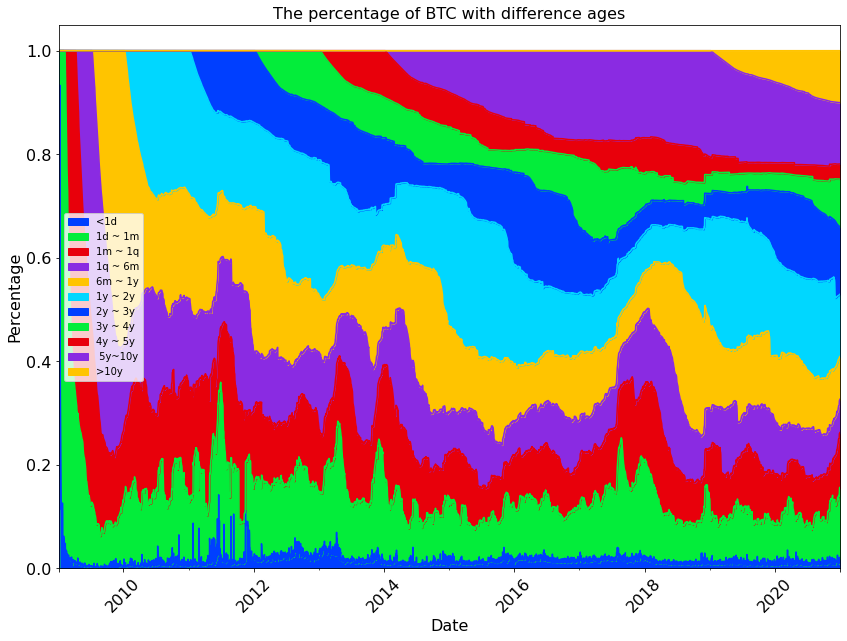

In [ ]:
plt.figure(figsize=(14, 10))
df_UTXO.plot.area(figsize=(14,10), fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Percentage',fontsize=16)
plt.title('The percentage of BTC with difference ages',fontsize=16)
plt.xticks(rotation=45)
plt.savefig('/content/drive/My Drive/CVML2021/btc_StakedAge.png')

In [ ]:
###Calculate Staking Ratio in different years
df_UTXO['One-year staking ratio']=df_UTXO[['1y ~ 2y', '2y ~ 3y','3y ~ 4y', '4y ~ 5y', ' 5y~10y', '>10y']].sum(axis=1)
df_UTXO['Two-year staking ratio']=df_UTXO[['2y ~ 3y','3y ~ 4y', '4y ~ 5y', ' 5y~10y', '>10y']].sum(axis=1)
df_UTXO['Three-year staking ratio']=df_UTXO[['3y ~ 4y', '4y ~ 5y', ' 5y~10y', '>10y']].sum(axis=1)
df_UTXO['Four-year staking ratio']=df_UTXO[['4y ~ 5y', ' 5y~10y', '>10y']].sum(axis=1)
df_UTXO['Five-year staking ratio']=df_UTXO[[' 5y~10y', '>10y']].sum(axis=1)
df_UTXO['Ten-year staking ratio']=df_UTXO[[ '>10y']].sum(axis=1)
df_UTXO.tail()

,<1d,1d ~ 1m,1m ~ 1q,1q ~ 6m,6m ~ 1y,1y ~ 2y,2y ~ 3y,3y ~ 4y,4y ~ 5y,5y~10y,>10y,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Four-year staking ratio,Five-year staking ratio,Ten-year staking ratio
2020-12-27,0.017810,0.121826,0.112338,0.063885,0.089066,0.123253,0.132847,0.090978,0.028995,0.118794,0.100206,0.595074,0.471821,0.338974,0.247995,0.219001,0.100206
2020-12-28,0.021149,0.127496,0.111604,0.063451,0.083734,0.121085,0.132213,0.091246,0.028996,0.118805,0.100221,0.592565,0.471481,0.339268,0.248022,0.219026,0.100221
2020-12-29,0.019785,0.135661,0.105108,0.064458,0.082931,0.120875,0.131812,0.091394,0.028982,0.118768,0.100227,0.592058,0.471183,0.339371,0.247977,0.218996,0.100227
2020-12-30,0.019352,0.137151,0.104854,0.064261,0.082758,0.120635,0.130633,0.092268,0.029122,0.118716,0.100249,0.591624,0.470989,0.340356,0.248088,0.218966,0.100249
2020-12-31,0.018846,0.136451,0.107075,0.064215,0.082527,0.120301,0.130032,0.092499,0.029143,0.118640,0.100272,0.590887,0.470586,0.340553,0.248054,0.218912,0.100272


<Figure size 1008x720 with 0 Axes>

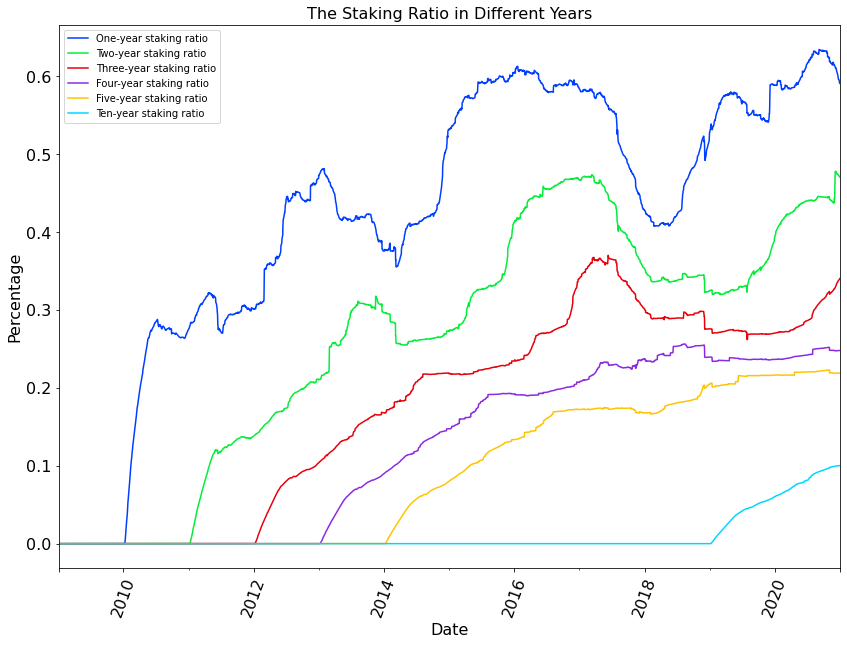

In [ ]:
plt.figure(figsize=(14, 10))
df_UTXO[['One-year staking ratio','Two-year staking ratio','Three-year staking ratio','Four-year staking ratio','Five-year staking ratio','Ten-year staking ratio']].plot(figsize=(14,10), fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Percentage',fontsize=16)
plt.title('The Staking Ratio in Different Years',fontsize=16)
plt.xticks(rotation=70)
plt.savefig('/content/drive/My Drive/CVML2021/btc_SR.png')

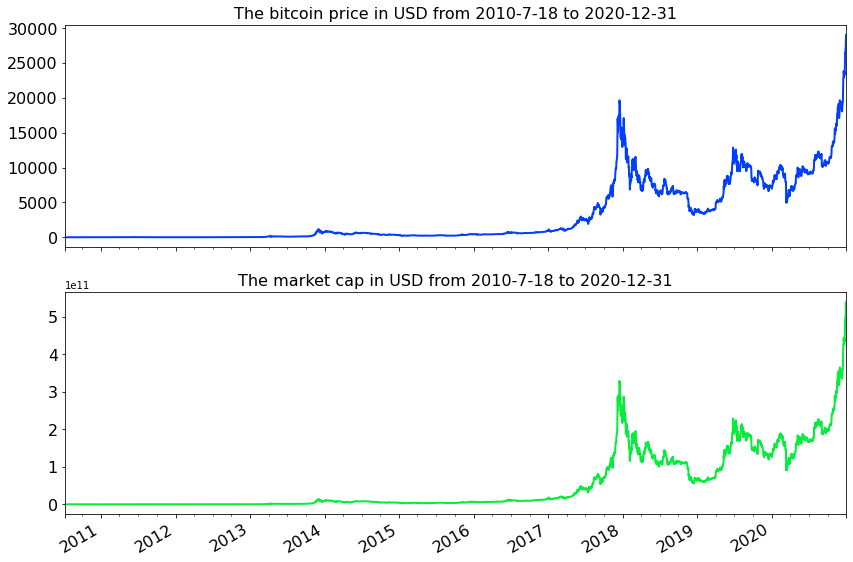

In [ ]:
#### Plot bitcoin price and the market cap
ax = df_btc[['PriceUSD','CapMrktCurUSD']]['2010-07-08': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The bitcoin price in USD from 2010-7-18 to 2020-12-31',fontsize=16)
ax[1][0].set_title('The market cap in USD from 2010-7-18 to 2020-12-31',fontsize=16)
plt.savefig('/content/drive/My Drive/CVML2021/btc_P_M.png')

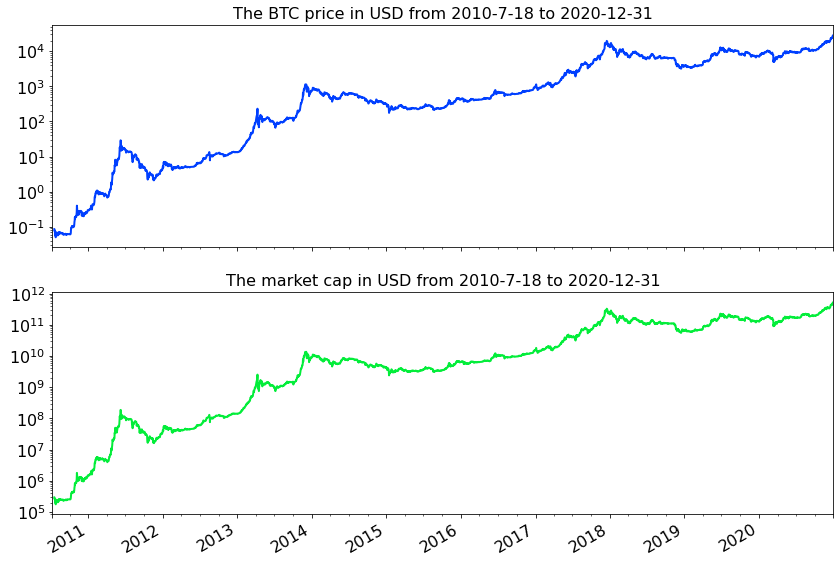

In [ ]:
#### Plot bitcoin price and the market cap
ax = df_btc[['PriceUSD','CapMrktCurUSD']]['2010-07-08': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The BTC price in USD from 2010-7-18 to 2020-12-31',fontsize=16)
ax[1][0].set_title('The market cap in USD from 2010-7-18 to 2020-12-31',fontsize=16)
ax[0][0].set_yscale('log')
ax[1][0].set_yscale('log')
plt.savefig('/content/drive/My Drive/CVML2021/btc_P_M_log.png')

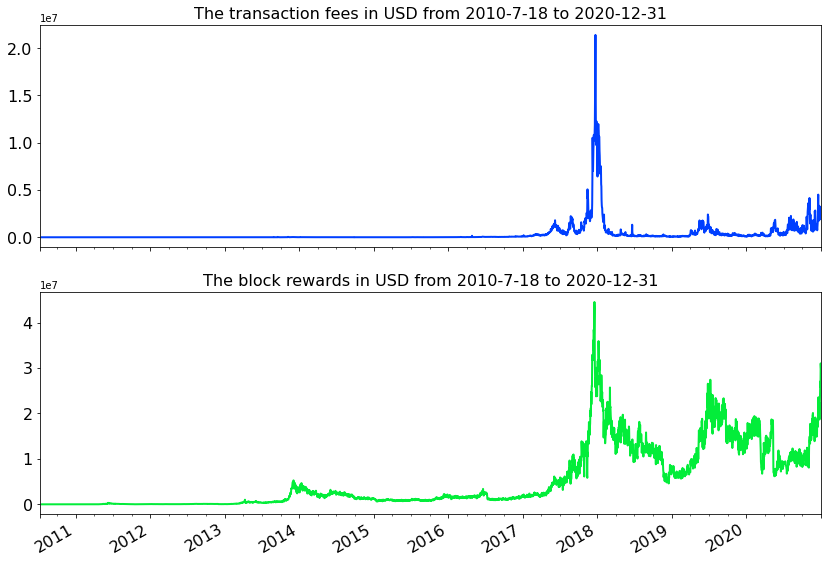

In [ ]:
#####plot Miners' revenue in USD: transaction fees and block rewards
ax = df_btc[['FeeTotUSD','IssTotUSD']]['2010-07-08': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The transaction fees in USD from 2010-7-18 to 2020-12-31',fontsize=16)
ax[1][0].set_title('The block rewards in USD from 2010-7-18 to 2020-12-31',fontsize=16)
plt.savefig('/content/drive/My Drive/CVML2021/btc_Revenue.png')

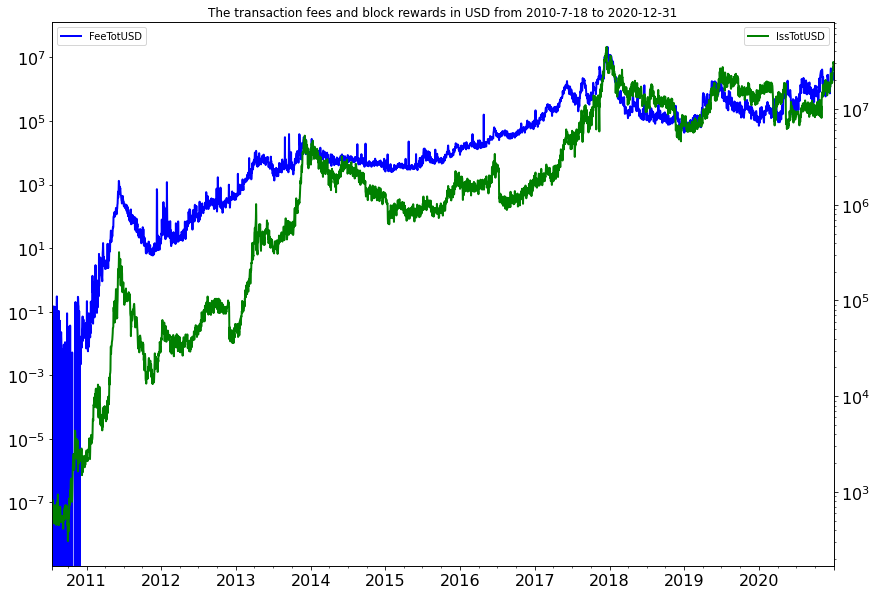

In [ ]:
fig, ax1 =plt.subplots()
ax1 = df_btc['FeeTotUSD']['2010-7-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16, color='blue')
plt.legend(loc='upper left')
ax2=ax1.twinx()
ax2=df_btc['IssTotUSD']['2010-7-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,color='green')
ax1.set_yscale('log')
ax2.set_yscale('log')
plt.title('The transaction fees and block rewards in USD from 2010-7-18 to 2020-12-31')
plt.legend(loc='best')
plt.savefig('/content/drive/My Drive/CVML2021/btc_tb.png')

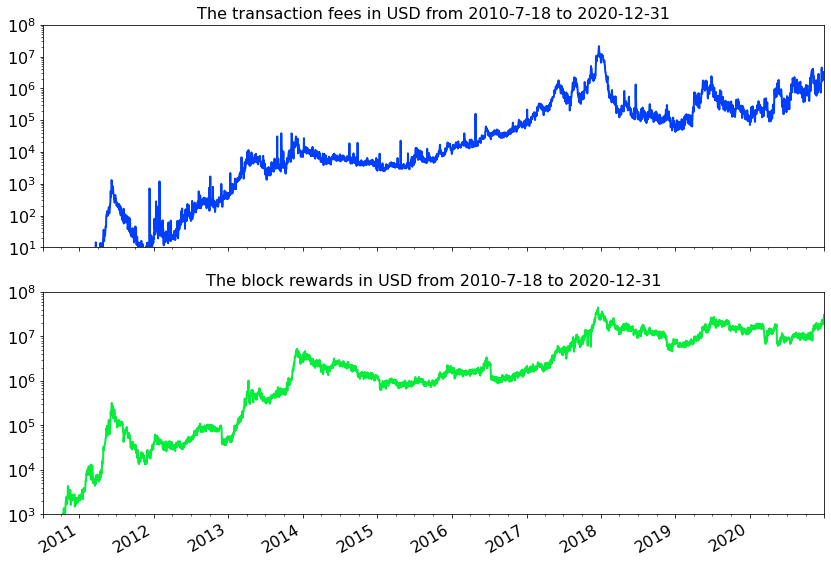

In [ ]:
#####plot Miners' revenue in USD: transaction fees and block rewards
ax = df_btc[['FeeTotUSD','IssTotUSD']]['2010-07-08': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The transaction fees in USD from 2010-7-18 to 2020-12-31',fontsize=16)
ax[1][0].set_title('The block rewards in USD from 2010-7-18 to 2020-12-31',fontsize=16)
ax[0][0].set_yscale('log')
ax[1][0].set_yscale('log')
ax[0][0].set_ylim([10,100000000])
ax[1][0].set_ylim([1000,100000000])
plt.savefig('/content/drive/My Drive/CVML2021/btc_Revenue_log.png')

In [ ]:
####calculate daily Revenue 
df_btc['The daily revenue of bitcoin miners']=df_btc['IssTotUSD']+df_btc['FeeTotUSD']
###calcualte the accumulated revenue 
df_btc['The accumulated revenue of bitcoin miners']=df_btc['The daily revenue of bitcoin miners'].cumsum()

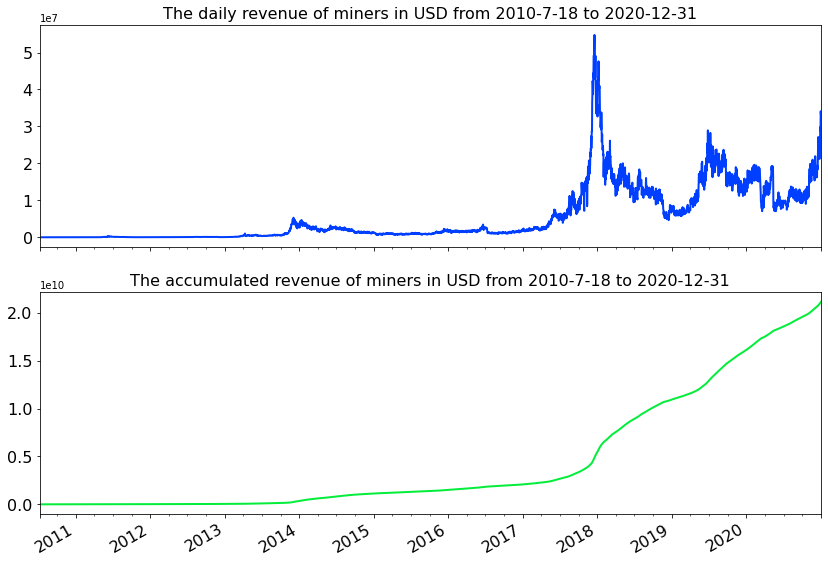

In [ ]:
#####plot the daily revenue and the accumulated revenue of bitcoin miners
ax = df_btc[['The daily revenue of bitcoin miners','The accumulated revenue of bitcoin miners']]['2010-07-08': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The daily revenue of miners in USD from 2010-7-18 to 2020-12-31',fontsize=16)
ax[1][0].set_title('The accumulated revenue of miners in USD from 2010-7-18 to 2020-12-31',fontsize=16)
plt.savefig('/content/drive/My Drive/CVML2021/btc_Revenue_merged.png')

In [ ]:
####calculate daily Revenue 
df_btc['The daily revenue of bitcoin miners']=df_btc['IssTotUSD']+df_btc['FeeTotUSD']
###calcualte the accumulated revenue 
df_btc['The accumulated revenue of bitcoin miners']=df_btc['The daily revenue of bitcoin miners'].cumsum()

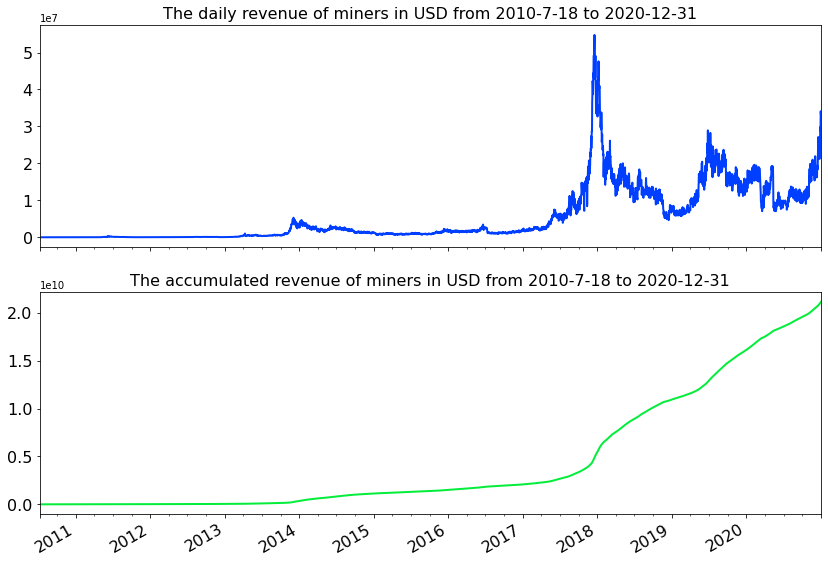

In [ ]:
#####plot the daily revenue and the accumulated revenue of bitcoin miners
ax = df_btc[['The daily revenue of bitcoin miners','The accumulated revenue of bitcoin miners']]['2010-07-08': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The daily revenue of miners in USD from 2010-7-18 to 2020-12-31',fontsize=16)
ax[1][0].set_title('The accumulated revenue of miners in USD from 2010-7-18 to 2020-12-31',fontsize=16)
plt.savefig('/content/drive/My Drive/CVML2021/btc_Revenue_merged.png')

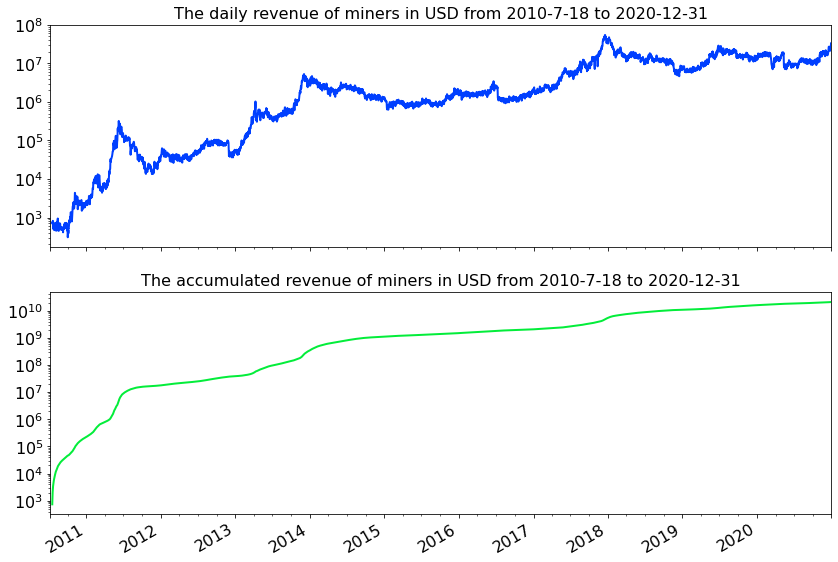

In [ ]:
#####plot the daily revenue and the accumulated revenue of bitcoin miners
ax = df_btc[['The daily revenue of bitcoin miners','The accumulated revenue of bitcoin miners']]['2010-07-08': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The daily revenue of miners in USD from 2010-7-18 to 2020-12-31',fontsize=16)
ax[1][0].set_title('The accumulated revenue of miners in USD from 2010-7-18 to 2020-12-31',fontsize=16)
ax[0][0].set_yscale('log')
ax[1][0].set_yscale('log')
plt.savefig('/content/drive/My Drive/CVML2021/btc_Revenue_merged_log.png')

In [ ]:
###calculate P/E Ratio=MarketCap/365*the moving average of miner's revenue in the past 365 days
df_btc['P/E Ratio']=df_btc['CapMrktCurUSD']/(365*df_btc['The daily revenue of bitcoin miners'])

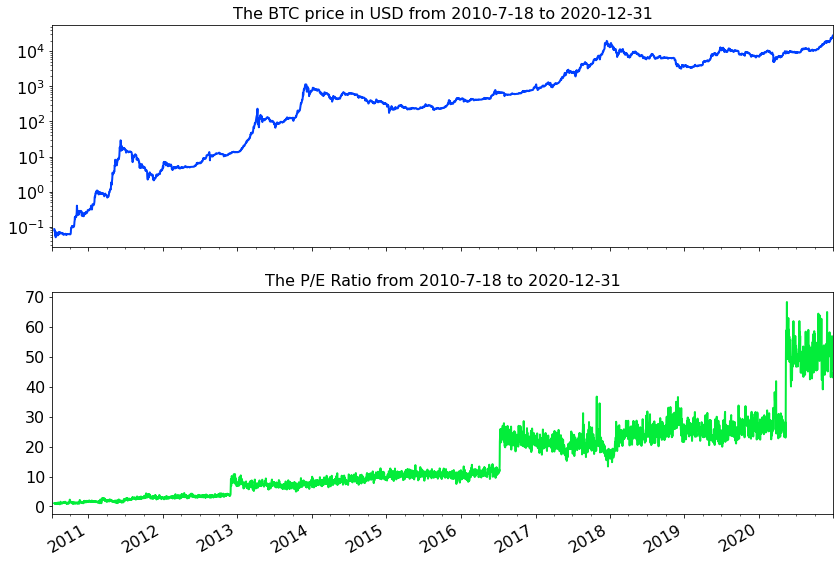

In [ ]:
#####plot the bitcoin price and the PE Ratio
ax = df_btc[['PriceUSD','P/E Ratio']]['2010-07-08': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The BTC price in USD from 2010-7-18 to 2020-12-31',fontsize=16)
ax[1][0].set_title('The P/E Ratio from 2010-7-18 to 2020-12-31',fontsize=16)
ax[0][0].set_yscale('log')
plt.savefig('/content/drive/My Drive/CVML2021/btc_PE_log.png')

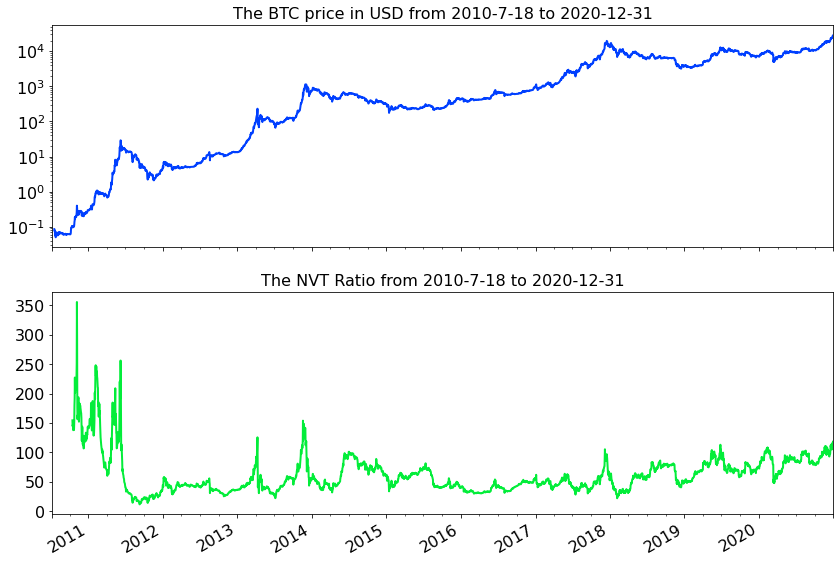

In [ ]:
#####plot the bitcion price and the NVT 90 Adjusted Ration
ax = df_btc[['PriceUSD','NVTAdj90']]['2010-07-08': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The BTC price in USD from 2010-7-18 to 2020-12-31',fontsize=16)
ax[1][0].set_title('The NVT Ratio from 2010-7-18 to 2020-12-31',fontsize=16)
ax[0][0].set_yscale('log')
plt.savefig('/content/drive/My Drive/CVML2021/btc_NVT_log.png')

In [ ]:
df_btc['Metcalfe']=df_btc['AdrActCnt'].pow(2)
df_btc['PM']=df_btc['PriceUSD']/df_btc['Metcalfe']

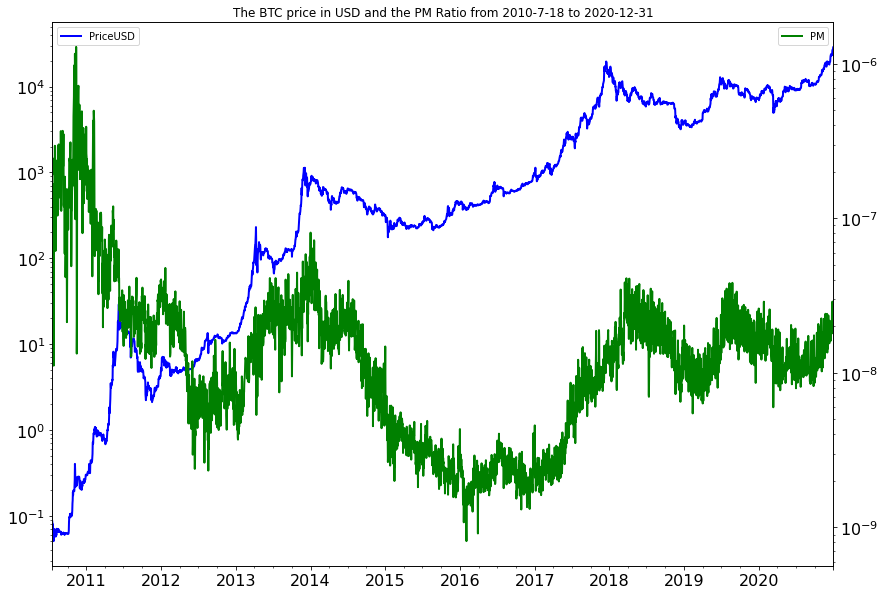

In [ ]:
fig, ax1 =plt.subplots()
ax1 = df_btc['PriceUSD']['2010-7-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16, color='blue')
plt.legend(loc='upper left')
ax2=ax1.twinx()
ax2=df_btc['PM']['2010-7-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,color='green')
ax1.set_yscale('log')
ax2.set_yscale('log')
plt.title('The BTC price in USD and the PM Ratio from 2010-7-18 to 2020-12-31')
plt.legend(loc='best')
plt.savefig('/content/drive/My Drive/CVML2021/btc_PTM.png')

In [ ]:
df_btc.index=pd.to_datetime(df_btc.index)
df_UTXO.index=pd.to_datetime(df_UTXO.index)
df = pd.merge(df_btc, df_UTXO, how='outer', left_index=True, right_index=True)
df.head()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,Volume,Annualized_DilutionRate,Total daily transaction volume,Velocity,The daily revenue of bitcoin miners,The accumulated revenue of bitcoin miners,P/E Ratio,Metcalfe,PM,<1d,1d ~ 1m,1m ~ 1q,1q ~ 6m,6m ~ 1y,1y ~ 2y,2y ~ 3y,3y ~ 4y,4y ~ 5y,5y~10y,>10y,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Four-year staking ratio,Five-year staking ratio,Ten-year staking ratio
2009-01-03,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-01-04,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-01-05,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-01-06,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-01-07,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
###token utility=100*velocity*staking ratio/(diluation rate*velocity)
df['Token Utility']=100*df['Velocity']*df['One-year staking ratio']/df['Annualized_DilutionRate']

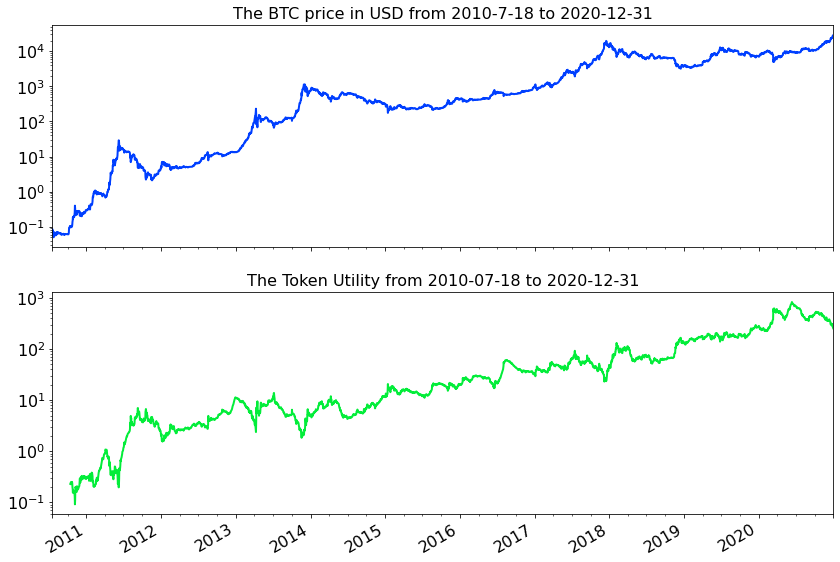

In [ ]:
#####plot the bitcion price and the token utility
ax = df[['PriceUSD','Token Utility']]['2010-07-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The BTC price in USD from 2010-7-18 to 2020-12-31',fontsize=16)
ax[1][0].set_title('The Token Utility from 2010-07-18 to 2020-12-31',fontsize=16)
ax[0][0].set_yscale('log')
ax[1][0].set_yscale('log')
plt.savefig('/content/drive/My Drive/CVML2021/btc_TU_log.png')

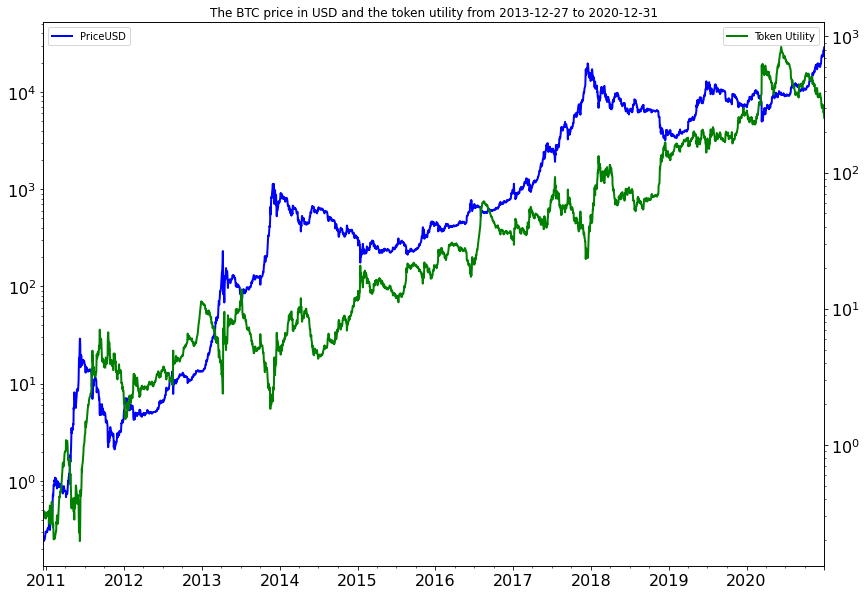

In [ ]:
fig, ax1 =plt.subplots()
ax1 = df['PriceUSD']['2010-12-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16, color='blue')
plt.legend(loc='upper left')
ax2=ax1.twinx()
ax2=df['Token Utility']['2010-12-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,color='green')
ax1.set_yscale('log')
ax2.set_yscale('log')
plt.title('The BTC price in USD and the token utility from 2013-12-27 to 2020-12-31')
plt.legend(loc='best')
plt.savefig('/content/drive/My Drive/CVML2021/btc_TU_log_same.png')

In [ ]:
###Calculate PU Ratio
df['PU Ratio']=df['PriceUSD']/df['Token Utility']

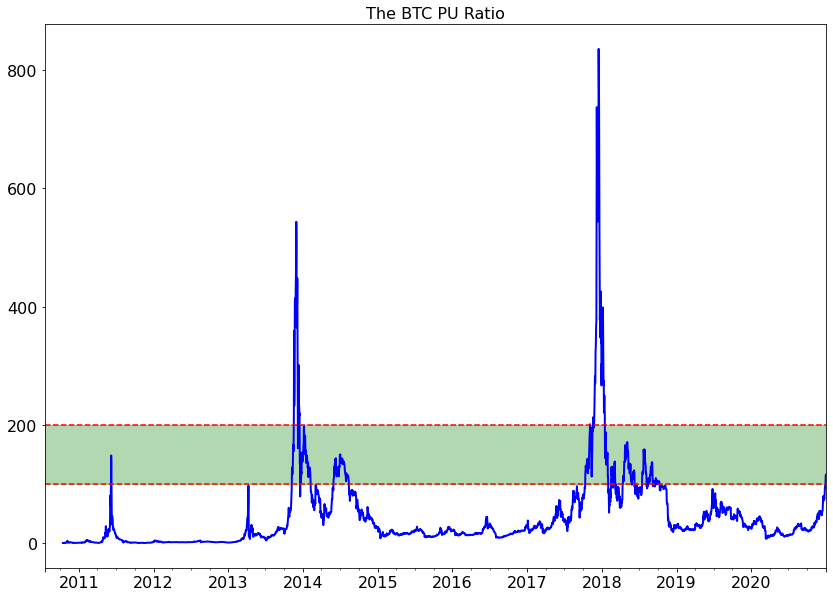

In [ ]:
ax=df['PU Ratio']['2010-07-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16, color='blue')
ax.axhspan(100, 200, color='green', alpha=0.3)
ax.axhline(100, color='red', linestyle='--')
ax.axhline(200, color='red', linestyle='--')
plt.title('The BTC PU Ratio',fontsize=16)
plt.savefig('/content/drive/My Drive/CVML2021/btc_PU.png')

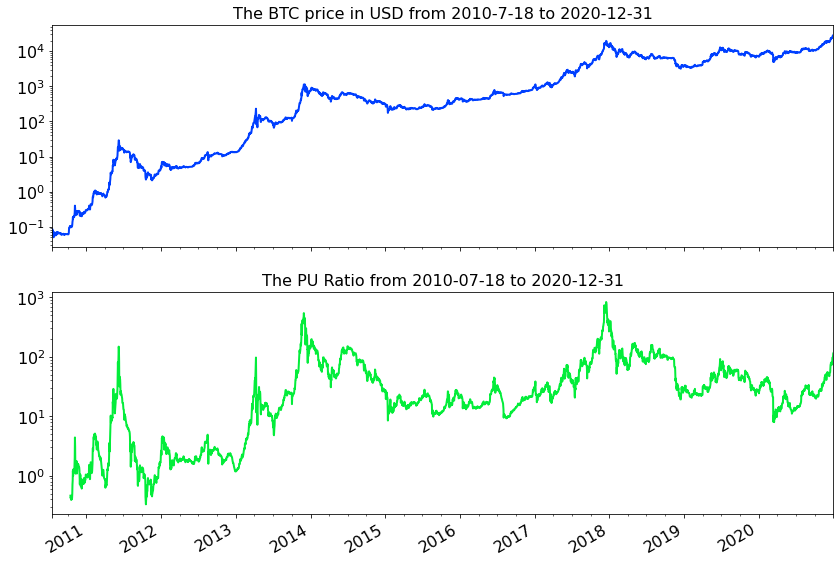

In [ ]:
#####plot the bitcion price and the PU Ratio
ax = df[['PriceUSD','PU Ratio']]['2010-07-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The BTC price in USD from 2010-7-18 to 2020-12-31',fontsize=16)
ax[1][0].set_title('The PU Ratio from 2010-07-18 to 2020-12-31',fontsize=16)
ax[0][0].set_yscale('log')
ax[1][0].set_yscale('log')
plt.savefig('/content/drive/My Drive/CVML2021/btc_PU_log.png')

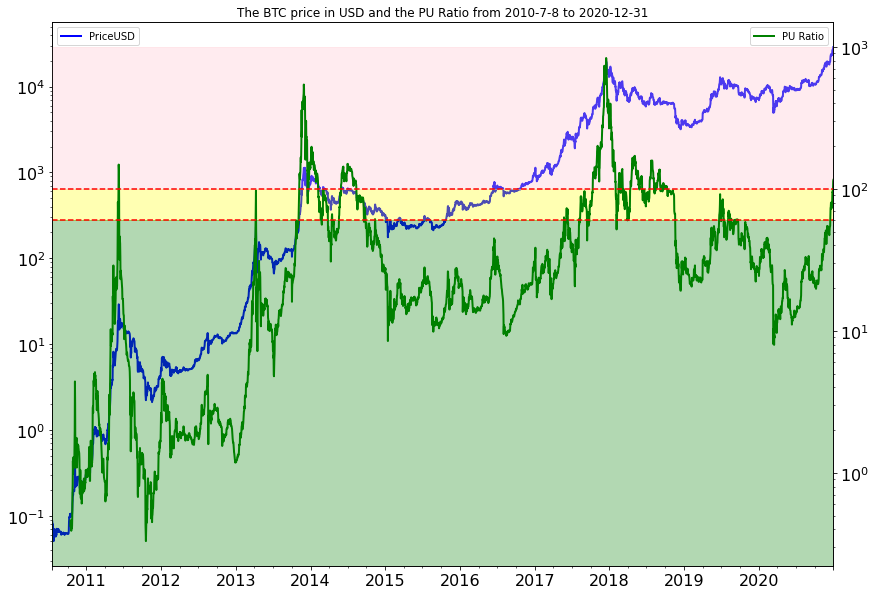

In [ ]:
fig, ax1 =plt.subplots()
ax1 = df['PriceUSD']['2010-07-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16, color='blue')
plt.legend(loc='upper left')
ax2=ax1.twinx()
ax2=df['PU Ratio']['2010-07-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,color='green')
ax1.set_yscale('log')
ax2.set_yscale('log')
plt.title('The BTC price in USD and the PU Ratio from 2010-7-8 to 2020-12-31')
####More about linestyle: https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html
ax2.axhline(60, color='red', linestyle='--')
ax2.axhline(100, color='red', linestyle='--')
ax2.axhspan(60, 100, color='yellow', alpha=0.3)
ax2.axhspan(100, 1000, color='pink', alpha=0.3)
ax2.axhspan(0, 60, color='green', alpha=0.3)



plt.legend(loc='best')
plt.savefig('/content/drive/My Drive/CVML2021/btc_PU_log_same_2.png')

In [ ]:
df.head()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,Volume,Annualized_DilutionRate,Total daily transaction volume,Velocity,The daily revenue of bitcoin miners,The accumulated revenue of bitcoin miners,P/E Ratio,Metcalfe,PM,<1d,1d ~ 1m,1m ~ 1q,1q ~ 6m,6m ~ 1y,1y ~ 2y,2y ~ 3y,3y ~ 4y,4y ~ 5y,5y~10y,>10y,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Four-year staking ratio,Five-year staking ratio,Ten-year staking ratio,Token Utility,PU Ratio
2009-01-03,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2009-01-04,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2009-01-05,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2009-01-06,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2009-01-07,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [ ]:
###The definition of the volatility
###The 180D volatility, measured as the standard deviation of the natural log of daily returns over the past 180 days.
df['volatility30']=(np.log(df['PriceUSD']/df['PriceUSD'].shift(1))).rolling(window=30).std()
df['volatility60']=(np.log(df['PriceUSD']/df['PriceUSD'].shift(1))).rolling(window=60).std()
df['volatility90']=(np.log(df['PriceUSD']/df['PriceUSD'].shift(1))).rolling(window=90).std()
df['volatility180']=(np.log(df['PriceUSD']/df['PriceUSD'].shift(1))).rolling(window=180).std()

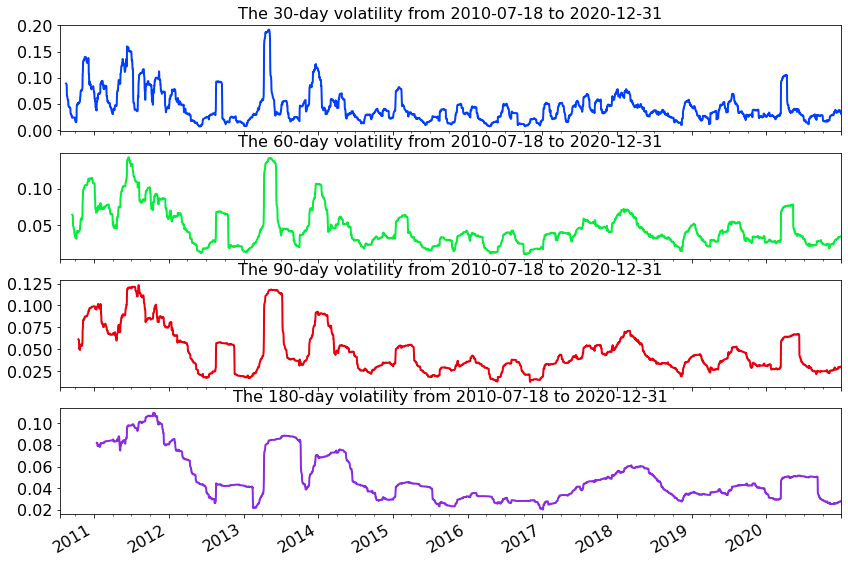

In [ ]:
#######plot Volatility using our own calculation
ax = df[['volatility30','volatility60','volatility90','volatility180']]['2010-07-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(4,1))
ax[0][0].set_title('The 30-day volatility from 2010-07-18 to 2020-12-31',fontsize=16)
ax[1][0].set_title('The 60-day volatility from 2010-07-18 to 2020-12-31',fontsize=16)
ax[2][0].set_title('The 90-day volatility from 2010-07-18 to 2020-12-31',fontsize=16)
ax[3][0].set_title('The 180-day volatility from 2010-07-18 to 2020-12-31',fontsize=16)
plt.savefig('/content/drive/My Drive/CVML2021/btc_volatility.png')

In [ ]:
####The PU Ration consider 180-day volatility
df['Token Utility_volatility']=df['Token Utility']/df['volatility180']*(df['volatility180'].mean())
df['PU Ratio_volatility']=df['PriceUSD']/df['Token Utility_volatility']

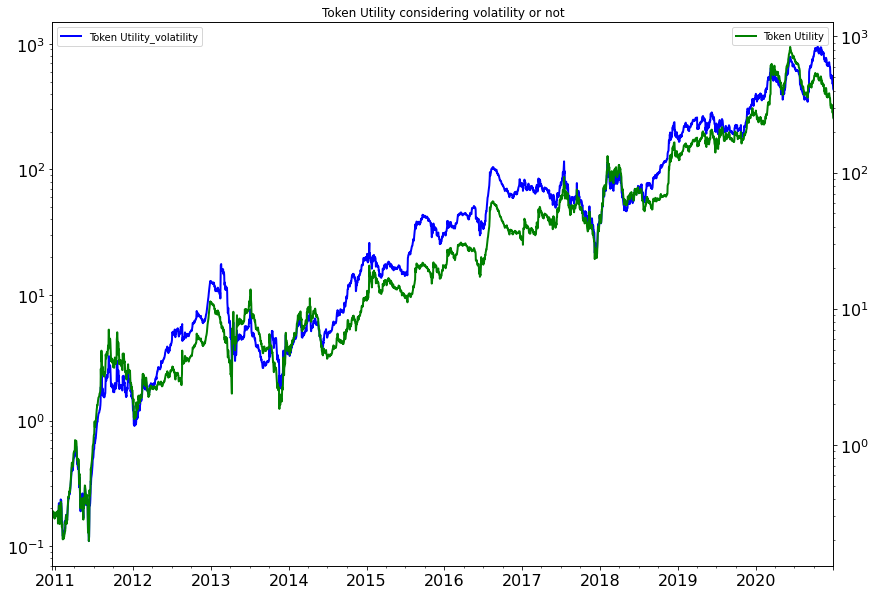

In [ ]:
fig, ax1 =plt.subplots()
ax1 = df['Token Utility_volatility']['2010-12-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16, color='blue')
plt.legend(loc='upper left')
ax2=ax1.twinx()
ax2=df['Token Utility']['2010-12-18': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,color='green')
ax1.set_yscale('log')
ax2.set_yscale('log')
plt.title('Token Utility considering volatility or not')
plt.legend(loc='best')
plt.savefig('/content/drive/My Drive/CVML2021/btc_TU_V.png')

In [ ]:
df.head()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,FeeTotNtv,FeeTotUSD,HashRate,IssContNtv,IssContPctAnn,IssContUSD,IssTotNtv,IssTotUSD,NVTAdj,NVTAdj90,PriceBTC,PriceUSD,ROI1yr,ROI30d,SplyCur,SplyExpFut10yrCMBI,SplyFF,TxCnt,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,Volume,Annualized_DilutionRate,Total daily transaction volume,Velocity,The daily revenue of bitcoin miners,The accumulated revenue of bitcoin miners,P/E Ratio,Metcalfe,PM,<1d,1d ~ 1m,1m ~ 1q,1q ~ 6m,6m ~ 1y,1y ~ 2y,2y ~ 3y,3y ~ 4y,4y ~ 5y,5y~10y,>10y,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Four-year staking ratio,Five-year staking ratio,Ten-year staking ratio,Token Utility,PU Ratio,volatility30,volatility60,volatility90,volatility180,Token Utility_volatility,PU Ratio_volatility
2009-01-03,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-04,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.to_csv('/content/drive/My Drive/CVML2021/BTC_2020_12_31.csv')